In [2]:
import pandas as pd
import os
import seaborn as sns

os.getcwd()
all_data = pd.read_csv('input/train.csv')
all_data.head()
all_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
all_data['relatives'] = all_data['SibSp'] + all_data['Parch']
all_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
relatives,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


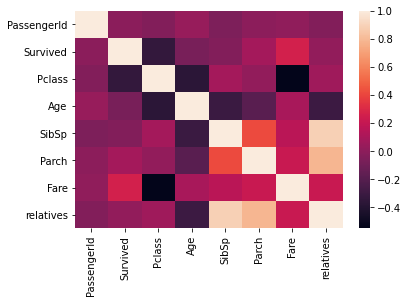

In [4]:
sns.heatmap(all_data.corr());

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='relatives', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='relatives', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId

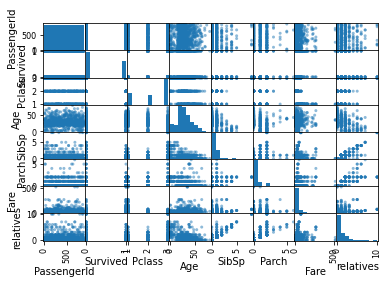

In [5]:
pd.plotting.scatter_matrix(all_data)

In [6]:
x_train = all_data[:800]
y_train_prepared = x_train['Survived'].to_numpy()

x_test = all_data[800:]
y_test_prepared = x_train['Survived'].to_numpy()

x_train = x_train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives
0,1,3,male,22.0,1,0,7.2500,S,1
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,0
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [26]:
all_data[all_data['Survived'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,5
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_sclare', StandardScaler())
])

num_attribs = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives']
cat_attribs = ['Sex', 'Embarked']
full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs)
])

x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)



In [9]:
for i in range(0, 5):
  print(x_train_prepared[i])


[-1.7298871   0.83099557 -0.57659039  0.45279236 -0.46661881 -0.5008189

  0.06838755  0.          1.          0.          0.          1.

  0.        ]

[-1.72555697 -1.56035858  0.65512783  0.45279236 -0.46661881  0.74272153

  0.06838755  1.          0.          1.          0.          0.

  0.        ]

[-1.72122683  0.83099557 -0.26866084 -0.48807488 -0.46661881 -0.48771025

 -0.56777569  1.          0.          0.          0.          1.

  0.        ]

[-1.7168967  -1.56035858  0.42418066  0.45279236 -0.46661881  0.38959794

  0.06838755  1.          0.          0.          0.          1.

  0.        ]

[-1.71256657  0.83099557  0.42418066 -0.48807488 -0.46661881 -0.48528273

 -0.56777569  0.          1.          0.          0.          1.

  0.        ]


In [10]:
from sklearn.linear_model import SGDClassifier

y_train_survived = (y_train_prepared == 1)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_prepared, y_train_survived)


SGDClassifier(random_state=42)

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train_prepared, y_train_survived, cv=3)


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_survived, y_train_pred)

array([[386, 106],
       [ 93, 215]])

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_survived, y_train_pred)


0.6697819314641744

In [14]:
recall_score(y_train_survived, y_train_pred)

0.698051948051948

In [15]:
f1_score(y_train_survived, y_train_pred)

0.6836248012718601

In [16]:
y_scores = cross_val_predict(sgd_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')

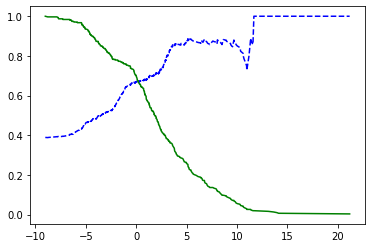

In [17]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_survived, y_scores)

import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

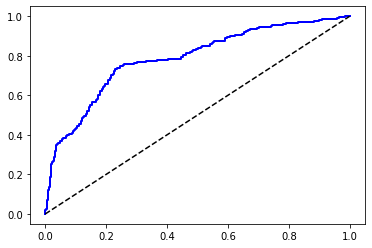

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_survived, y_scores)

def plot_roc_curve(fpr, tpr, decoration, label=None):
    plt.plot(fpr, tpr, decoration, linewidth=2, label=label)
    plt.plot( [0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr, 'b-')
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_survived, y_scores)

0.7859980466687784

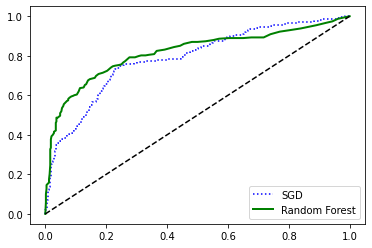

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(x_train_prepared, y_train_survived)
y_probas_forest = cross_val_predict(forest_clf, x_train_prepared, y_train_survived, cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_survived, y_scores_forest)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'g-', "Random Forest")
plt.legend(loc="lower right")
plt.show()

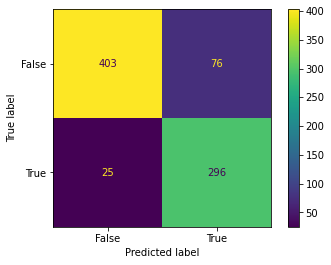

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(sgd_clf, x_train_prepared, y_train_pred)

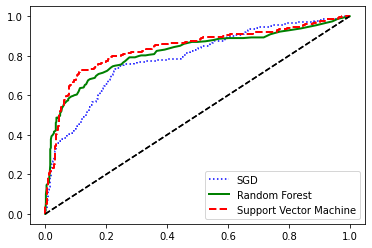

In [22]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train_prepared, y_train_survived)
y_scores_svm = cross_val_predict(svm_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_survived, y_scores_svm)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'g-', "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, 'r--', "Support Vector Machine")
plt.legend(loc="lower right")
plt.show()

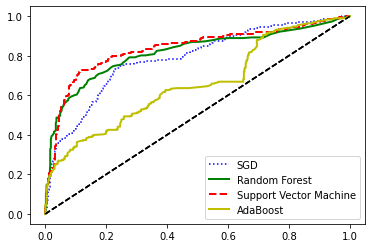

In [23]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(random_state = 42)
adaboost_clf.fit(x_train_prepared, y_train_survived)
y_scores_adaboost = cross_val_predict(adaboost_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_train_survived, y_scores_adaboost)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'g-', "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, 'r--', "Support Vector Machine")
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'y-', "AdaBoost")
plt.legend(loc="lower right")
plt.show()


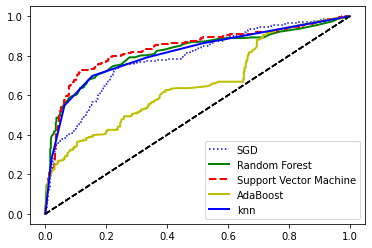

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_prepared, y_train_survived)
y_probas_knn = cross_val_predict(knn_clf, x_train_prepared, y_train_survived, cv=3, method='predict_proba')
y_scores_knn = y_probas_knn[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_survived, y_scores_knn)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'g-', "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, 'r--', "Support Vector Machine")
plot_roc_curve(fpr_adaboost, tpr_adaboost, 'y-', "AdaBoost")
plot_roc_curve(fpr_knn, tpr_knn, 'b-', "knn")
plt.legend(loc="lower right")
plt.show()


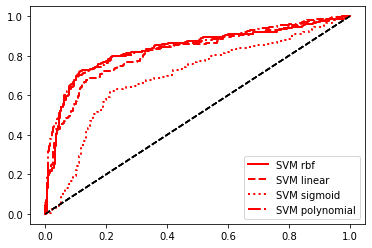

In [25]:
from sklearn.svm import SVC

svml_clf = SVC(kernel='linear')
svml_clf.fit(x_train_prepared, y_train_survived)
y_scores_svml = cross_val_predict(svml_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')
fpr_svml, tpr_svml, thresholds_svml = roc_curve(y_train_survived, y_scores_svml)

svms_clf = SVC(kernel='sigmoid')
svms_clf.fit(x_train_prepared, y_train_survived)
y_scores_svms = cross_val_predict(svms_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')
fpr_svms, tpr_svms, thresholds_svms = roc_curve(y_train_survived, y_scores_svms)

svmp_clf = SVC(kernel='poly')
svmp_clf.fit(x_train_prepared, y_train_survived)
y_scores_svmp = cross_val_predict(svmp_clf, x_train_prepared, y_train_survived, cv=3, method='decision_function')
fpr_svmp, tpr_svmp, thresholds_svmp = roc_curve(y_train_survived, y_scores_svmp)

plot_roc_curve(fpr_svm, tpr_svm, 'r-', "SVM rbf")
plot_roc_curve(fpr_svml, tpr_svml, 'r--', "SVM linear")
plot_roc_curve(fpr_svms, tpr_svms, 'r:', "SVM sigmoid")
plot_roc_curve(fpr_svmp, tpr_svmp, 'r-.', "SVM polynomial")

plt.legend(loc="lower right")
plt.show()

In [26]:
all_data.shape


(891, 13)